In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('survey.csv')

# Show the first 5 rows of the data
df.head()




,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [8]:
# Get a quick overview of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [9]:
# Drop the 'comments' column (not useful for analysis)
df.drop('comments', axis=1, inplace=True)

# Fill missing self_employed and work_interfere with 'Unknown'
df['self_employed'].fillna('Unknown', inplace=True)
df['work_interfere'].fillna('Unknown', inplace=True)

# Optional: drop rows with missing 'state' (since it's not very useful here)
df.drop('state', axis=1, inplace=True)

# Double-check: show missing values now
df.isnull().sum()


<ipython-input-9-7b52d82dfdf3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].fillna('Unknown', inplace=True)
<ipython-input-9-7b52d82dfdf3>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,0
Timestamp,0
Age,0
Gender,0
Country,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0
remote_work,0


<ipython-input-10-d8d13daa6146>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=treatment_counts.index, y=treatment_counts.values, palette='Set2')


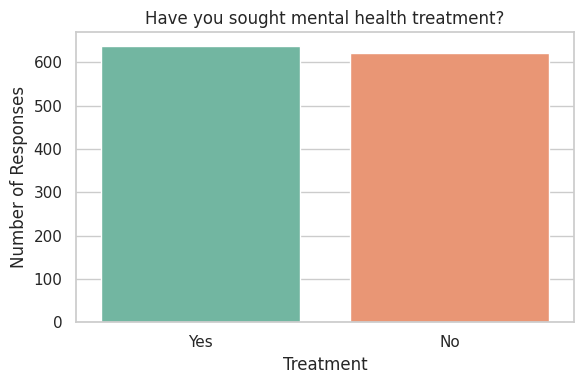

In [10]:
# Count how many said Yes or No to receiving treatment
treatment_counts = df['treatment'].value_counts()

# Create a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x=treatment_counts.index, y=treatment_counts.values, palette='Set2')
plt.title('Have you sought mental health treatment?')
plt.xlabel('Treatment')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.show()


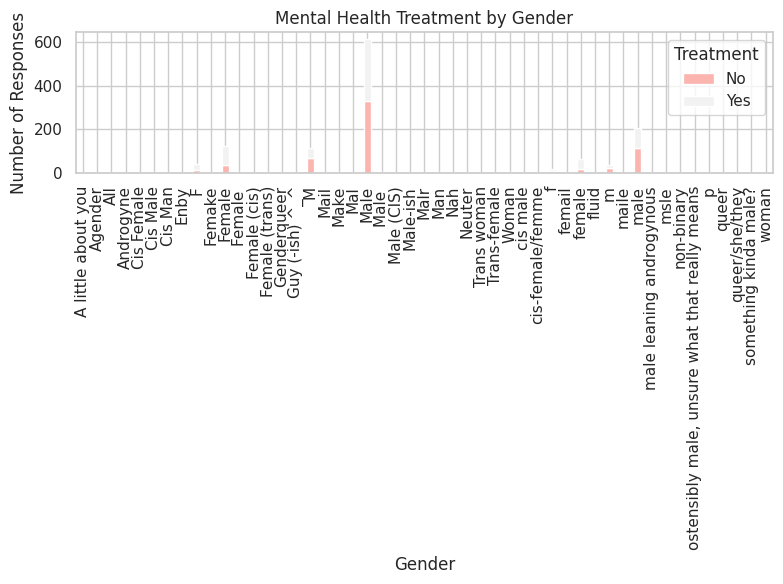

In [11]:
# Group the data by Gender and Treatment, then count how many responses
gender_treatment = df.groupby(['Gender', 'treatment']).size().unstack()

# Create a bar chart to compare treatment across genders
gender_treatment.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Pastel1')
plt.title('Mental Health Treatment by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Responses')
plt.legend(title='Treatment')
plt.tight_layout()
plt.show()


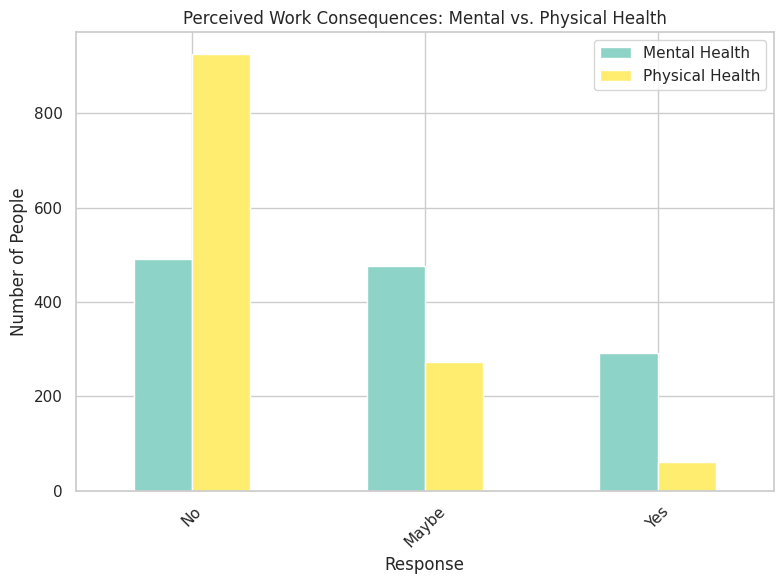

In [12]:
# Count responses for both columns
mental_consequence = df['mental_health_consequence'].value_counts()
physical_consequence = df['phys_health_consequence'].value_counts()

# Combine into one DataFrame
comparison = pd.DataFrame({
    'Mental Health': mental_consequence,
    'Physical Health': physical_consequence
}).fillna(0)

# Plot side-by-side
comparison.plot(kind='bar', figsize=(8,6), colormap='Set3')
plt.title('Perceived Work Consequences: Mental vs. Physical Health')
plt.xlabel('Response')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
